In [1]:
# Libraries
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for seaborn
sns.set(style="whitegrid")

In [2]:
file_path = "/content/drive/MyDrive/Colab/NU/CIVE7381/Project/jpl.json"

# Load the JSON data as a list of dictionaries
with open(file_path, 'r') as f:
    data = json.load(f)

# Access the data under the '_items' key
items_data = data['_items']

# Normalize the data:
df = pd.json_normalize(items_data)

# Extract meta data separately:
meta_data = data['_meta']
for key, value in meta_data.items():
    df[key] = value

df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,end,min_kWh,site,start
0,5c36621bf9af8b4639a8e0b4,0001,"Wed, 05 Sep 2018 11:04:13 GMT","Wed, 05 Sep 2018 19:09:35 GMT",None,9.583,1_1_179_800_2018-09-05 11:04:12.876087,0001,AG-3F32,1-1-179-800,America/Los_Angeles,None,None,None,None,jpl,None
1,5c36621bf9af8b4639a8e0b5,0001,"Wed, 05 Sep 2018 11:08:09 GMT","Wed, 05 Sep 2018 14:09:02 GMT",None,7.114,1_1_179_794_2018-09-05 11:08:08.945820,0001,AG-3F20,1-1-179-794,America/Los_Angeles,000000333,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",None,None,jpl,None
2,5c36621bf9af8b4639a8e0b6,0001,"Wed, 05 Sep 2018 12:35:14 GMT","Thu, 06 Sep 2018 00:30:12 GMT",None,11.774,1_1_179_797_2018-09-05 12:35:14.070250,0001,AG-3F23,1-1-179-797,America/Los_Angeles,000000371,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",None,None,jpl,None
3,5c36621bf9af8b4639a8e0b7,0001,"Wed, 05 Sep 2018 12:51:31 GMT","Wed, 05 Sep 2018 22:32:58 GMT",None,6.280,1_1_179_781_2018-09-05 12:51:31.050539,0001,AG-3F31,1-1-179-781,America/Los_Angeles,000000405,"[{'WhPerMile': 600, 'kWhRequested': 12.0, 'mil...",None,None,jpl,None
4,5c36621bf9af8b4639a8e0b8,0001,"Wed, 05 Sep 2018 13:08:28 GMT","Wed, 05 Sep 2018 23:32:52 GMT",None,7.022,1_1_179_787_2018-09-05 13:08:27.901538,0001,AG-3F16,1-1-179-787,America/Los_Angeles,000000368,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",None,None,jpl,None


In [3]:
# Size of df
df.shape

(12299, 17)

In [4]:
# Data type of each column
df.dtypes

,0
_id,object
clusterID,object
connectionTime,object
disconnectTime,object
doneChargingTime,object
kWhDelivered,float64
sessionID,object
siteID,object
spaceID,object
stationID,object


In [5]:
# Convert columns with date/time to Pandas datetime objects
df['connectionTime'] = pd.to_datetime(df['connectionTime'])
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'])
df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'])

In [6]:
# Display unique categories in certain columns
specified_columns = ['clusterID', 'siteID', 'spaceID', 'stationID', 'timezone', 'site']

for col in specified_columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 20)
    print()

Unique values in column 'clusterID':
['0001']
--------------------

Unique values in column 'siteID':
['0001']
--------------------

Unique values in column 'spaceID':
['AG-3F32' 'AG-3F20' 'AG-3F23' 'AG-3F31' 'AG-3F16' 'AG-3F18' 'AG-3F27'
 'AG-3F28' 'AG-3F22' 'AG-3F21' 'AG-4F41' 'AG-4F35' 'AG-4F42' 'AG-4F44'
 'AG-4F38' 'AG-4F43' 'AG-4F37' 'AG-3F17' 'AG-3F26' 'AG-3F19' 'AG-3F30'
 'AG-4F50' 'AG-3F24' 'AG-4F52' 'AG-3F29' 'AG-3F25' 'AG-4F47' 'AG-3F15'
 'AG-4F40' 'AG-4F46' 'AG-4F49' 'AG-4F39' 'AG-4F34' 'AG-4F51' 'AG-3F33'
 'AG-4F45' 'AG-4F48' 'AG-4F36' 'AG-1F01' 'AG-1F06' 'AG-1F09' 'AG-1F02'
 'AG-1F14' 'AG-1F07' 'AG-1F04' 'AG-1F08' 'AG-1F05' 'AG-1F03' 'AG-1F13'
 'AG-1F12' 'AG-1F11' 'AG-1F10']
--------------------

Unique values in column 'stationID':
['1-1-179-800' '1-1-179-794' '1-1-179-797' '1-1-179-781' '1-1-179-787'
 '1-1-179-798' '1-1-179-809' '1-1-179-777' '1-1-179-788' '1-1-179-801'
 '1-1-191-806' '1-1-191-808' '1-1-191-811' '1-1-191-802' '1-1-191-793'
 '1-1-191-778' '1-1-191-792' '1

In [7]:
# Determine if spaceID and stationID have a one-to-one mapping
space_to_station = df.set_index('spaceID')['stationID'].to_dict()
station_to_space = df.set_index('stationID')['spaceID'].to_dict()

is_one_to_one = all(space_to_station[station_to_space[station]] == station
                    for station in station_to_space)

print(f"spaceID and stationID have a one-to-one mapping: {is_one_to_one}")

spaceID and stationID have a one-to-one mapping: True


In [8]:
# How many stations at the site?
df['spaceID'].nunique()

52

In [9]:
# Missing values
df.isnull().sum()

,0
_id,0
clusterID,0
connectionTime,0
disconnectTime,0
doneChargingTime,1275
kWhDelivered,0
sessionID,0
siteID,0
spaceID,0
stationID,0


In [10]:
end_unique, start_unique = df['end'].unique(), df['start'].unique()
print(f"Unique values in 'end': {end_unique}\nUnique values in 'start': {start_unique}")

Unique values in 'end': [None]
Unique values in 'start': [None]


In [11]:
# Subset the DataFrame to January to March 2019
df = df[
    (df['connectionTime'].dt.month >= 1) &
    (df['connectionTime'].dt.month <= 3) &
    (df['connectionTime'].dt.year == 2019)
].copy()

In [12]:
# Calculate Session Duration in Hours
df.loc[:, 'sessionDuration'] = (
    (df['disconnectTime'] - df['connectionTime'])
    .dt.total_seconds() / 3600
)

# Time-based features for demand forecasting

# Connection time features
df.loc[:, 'hourOfDay_c'] = df['connectionTime'].dt.hour
df.loc[:, 'dayOfWeek_c'] = df['connectionTime'].dt.dayofweek
df.loc[:, 'monthOfYear_c'] = df['connectionTime'].dt.month
df.loc[:, 'dayOfMonth_c'] = df['connectionTime'].dt.day

# Disconnection time features
df.loc[:, 'hourOfDay_d'] = df['disconnectTime'].dt.hour
df.loc[:, 'dayOfWeek_d'] = df['disconnectTime'].dt.dayofweek
df.loc[:, 'monthOfYear_d'] = df['disconnectTime'].dt.month
df.loc[:, 'dayOfMonth_d'] = df['disconnectTime'].dt.day


In [13]:
df['sessionDuration'].describe()

,sessionDuration
count,4059.000000
mean,7.340491
std,3.183976
min,0.153333
25%,4.579444
50%,8.606667
75%,9.785000
max,20.861389


In [14]:
# Aggregate session counts per connection hour, per day
hourly_session_counts_c = df.groupby([
    pd.Grouper(key='connectionTime', freq='h'),
    'dayOfMonth_c',
    'dayOfWeek_c',
    'monthOfYear_c'
]).size().reset_index()

# Rename the '0' column to 'session_count_c'
hourly_session_counts_c = hourly_session_counts_c.rename(columns={0: 'session_count_c'})

In [15]:
hourly_session_counts_c

,connectionTime,dayOfMonth_c,dayOfWeek_c,monthOfYear_c,session_count_c
0,2019-01-02 01:00:00,2,2,1,1
1,2019-01-02 13:00:00,2,2,1,4
2,2019-01-02 14:00:00,2,2,1,16
3,2019-01-02 15:00:00,2,2,1,14
4,2019-01-02 16:00:00,2,2,1,13
...,...,...,...,...,...
780,2019-03-30 18:00:00,30,5,3,1
781,2019-03-30 20:00:00,30,5,3,1
782,2019-03-31 14:00:00,31,6,3,1
783,2019-03-31 18:00:00,31,6,3,1


In [16]:
# Aggregate session counts per disconnection hour, per day
hourly_session_counts_d = df.groupby([
    pd.Grouper(key='disconnectTime', freq='h'),
    'dayOfMonth_d',
    'dayOfWeek_d',
    'monthOfYear_d'
]).size().reset_index()

# Rename the '0' column to 'session_count_d'
hourly_session_counts_d = hourly_session_counts_d.rename(columns={0: 'session_count_d'})

In [17]:
hourly_session_counts_d

,disconnectTime,dayOfMonth_d,dayOfWeek_d,monthOfYear_d,session_count_d
0,2019-01-02 02:00:00,2,2,1,1
1,2019-01-02 17:00:00,2,2,1,2
2,2019-01-02 19:00:00,2,2,1,3
3,2019-01-02 20:00:00,2,2,1,5
4,2019-01-02 21:00:00,2,2,1,4
...,...,...,...,...,...
808,2019-03-31 01:00:00,31,6,3,2
809,2019-03-31 03:00:00,31,6,3,1
810,2019-03-31 22:00:00,31,6,3,1
811,2019-04-01 00:00:00,1,0,4,1


In [18]:
df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,start,sessionDuration,hourOfDay_c,dayOfWeek_c,monthOfYear_c,dayOfMonth_c,hourOfDay_d,dayOfWeek_d,monthOfYear_d,dayOfMonth_d
4775,5c367215f9af8b4639a8f35f,0001,2019-01-02 01:00:51,2019-01-02 02:39:46,2019-01-02 02:39:37,10.143,1_1_193_829_2019-01-02 01:00:51.413435,0001,AG-1F03,1-1-193-829,...,None,1.648611,1,2,1,2,2,2,1,2
4776,5c367245f9af8b4639a8f360,0001,2019-01-02 13:39:11,2019-01-03 01:19:57,2019-01-02 15:37:12,5.871,1_1_191_789_2019-01-02 13:39:11.359003,0001,AG-4F52,1-1-191-789,...,None,11.679444,13,2,1,2,1,3,1,3
4777,5c367245f9af8b4639a8f361,0001,2019-01-02 13:44:27,2019-01-02 22:37:33,2019-01-02 19:18:16,12.094,1_1_178_823_2019-01-02 13:44:26.828039,0001,AG-1F08,1-1-178-823,...,None,8.885000,13,2,1,2,22,2,1,2
4778,5c367245f9af8b4639a8f362,0001,2019-01-02 13:47:38,2019-01-02 19:01:31,2019-01-02 15:06:07,2.425,1_1_193_829_2019-01-02 13:47:38.465648,0001,AG-1F03,1-1-193-829,...,None,5.231389,13,2,1,2,19,2,1,2
4779,5c367245f9af8b4639a8f363,0001,2019-01-02 13:53:41,2019-01-02 21:40:03,2019-01-02 16:45:46,14.331,1_1_193_819_2019-01-02 13:53:40.716472,0001,AG-1F06,1-1-193-819,...,None,7.772778,13,2,1,2,21,2,1,2


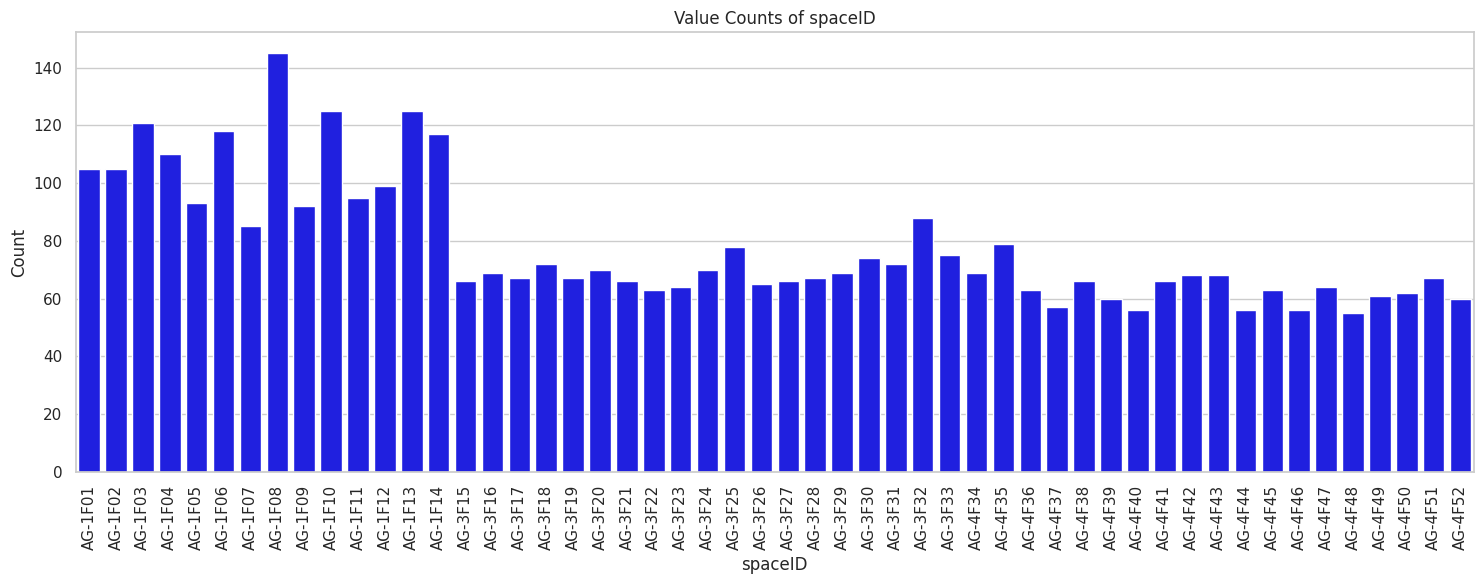

In [19]:
# Value Counts of spaceID
space_id_counts = df['spaceID'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
sns.barplot(x=space_id_counts.index, y=space_id_counts.values, color='blue')
plt.title('Value Counts of spaceID')
plt.xlabel('spaceID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
# Delete irrelevant features
df = df.drop(columns=['min_kWh', '_id', 'site','kWhDelivered', 'userInputs', 'userID', 'spaceID', 'doneChargingTime', 'sessionID', 'stationID', 'start', 'end', 'timezone', 'clusterID', 'siteID'])

In [21]:
df

,connectionTime,disconnectTime,sessionDuration,hourOfDay_c,dayOfWeek_c,monthOfYear_c,dayOfMonth_c,hourOfDay_d,dayOfWeek_d,monthOfYear_d,dayOfMonth_d
4775,2019-01-02 01:00:51,2019-01-02 02:39:46,1.648611,1,2,1,2,2,2,1,2
4776,2019-01-02 13:39:11,2019-01-03 01:19:57,11.679444,13,2,1,2,1,3,1,3
4777,2019-01-02 13:44:27,2019-01-02 22:37:33,8.885000,13,2,1,2,22,2,1,2
4778,2019-01-02 13:47:38,2019-01-02 19:01:31,5.231389,13,2,1,2,19,2,1,2
4779,2019-01-02 13:53:41,2019-01-02 21:40:03,7.772778,13,2,1,2,21,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
8829,2019-03-30 18:36:53,2019-03-30 20:20:32,1.727500,18,5,3,30,20,5,3,30
8830,2019-03-30 20:26:19,2019-03-31 03:51:02,7.411944,20,5,3,30,3,6,3,31
8831,2019-03-31 14:48:19,2019-04-01 01:57:50,11.158611,14,6,3,31,1,0,4,1
8832,2019-03-31 18:27:54,2019-03-31 22:47:15,4.322500,18,6,3,31,22,6,3,31


In [22]:
# Save dataFrames
import os

base_path = '/content/drive/MyDrive/Colab/NU/CIVE7381/Project/'

# Filenames
filenames = {
    'df': 'jpl_final.csv',
    'hourly_session_counts_c': 'hourly_aggr_c.csv',
    'hourly_session_counts_d': 'hourly_aggr_d.csv'
}

# Dictionary to store the DataFrames
dataframes = {
    'df': df,
    'hourly_session_counts_c': hourly_session_counts_c,
    'hourly_session_counts_d': hourly_session_counts_d
}

# Save each DataFrame to a separate CSV file
for name, dataframe in dataframes.items():
    save_path = os.path.join(base_path, filenames[name])
    dataframe.to_csv(save_path, index=False)

print("All DataFrames saved successfully!")

All DataFrames saved successfully!
